In [ ]:
## Notebook env: cell2loc_env (cell2loc_env kernel)
## this notebook performs cell2location to *spatially* deconvolute cells using a reference annotated scRNAseq dataset

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os

data_type = 'float32'

import cell2location

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

Global seed set to 0


In [21]:
results_folder = '/home/ssobti/projects/farnaz_spatial/output_data/cell2location/predicted_celltype_annot'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map/N2_alpha20'

In [22]:
adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)
mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

INFO     File                                                                                                      
         /home/ssobti/projects/farnaz_spatial/output_data/cell2location/predicted_celltype_annot/cell2location_map/
         N2_alpha20/model.pt already downloaded                                                                    


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/30000:   0%|                                   | 1/30000 [00:04<37:56:04,  4.55s/it, v_num=1, elbo_train=2.18e+8]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 1/30000:   0%|                                   | 1/30000 [00:04<38:00:32,  4.56s/it, v_num=1, elbo_train=2.18e+8]


In [4]:
adata_vis.obsm['spatial']

array([[1393, 1193],
       [ 454, 1376],
       [ 339, 1062],
       ...,
       [ 751, 1451],
       [ 580, 1196],
       [ 847,  446]])

In [5]:
adata_vis.obsm['q05_cell_abundance_w_sf']

q05cell_abundance_w_sf_ASPC  \
spot_id                                                    
count-A1_AAACAAGTATCTCCCA-1                     0.307390   
count-A1_AAACACCAATAACTGC-1                     0.007228   
count-A1_AAACAGCTTTCAGAAG-1                     0.021488   
count-A1_AAACAGGGTCTATATT-1                     0.021936   
count-A1_AAACAGTGTTCCTGGG-1                     0.007812   
...                                                  ...   
count-D1_TTGTTAGCAAATTCGA-1                     0.017880   
count-D1_TTGTTCAGTGTGCTAC-1                     0.042940   
count-D1_TTGTTTCACATCCAGG-1                     0.027624   
count-D1_TTGTTTCCATACAACT-1                     0.023254   
count-D1_TTGTTTGTGTAAATTC-1                     0.023918   

                             q05cell_abundance_w_sf_LEC  \
spot_id                                                   
count-A1_AAACAAGTATCTCCCA-1                    0.013503   
count-A1_AAACACCAATAACTGC-1                    0.009215   
count-A1_AAACAGCTTTCAGAAG-1                    0.033206   
count-A1_AAACAGGGTCTATATT-1                    0.028997   
count-A1_AAACAGTGTTCCTGGG-1                    0.011640   
...                                                 ...   
count-D1_TTGTTAGCAAATTCGA-1                    0.020585   
count-D1_TTGTTCAGTGTGCTAC-1                    0.022239   
count-D1_TTGTTTCACATCCAGG-1                    0.028748   
count-D1_TTGTTTCCATACAACT-1                    0.029941   
count-D1_TTGTTTGTGTAAATTC-1                    0.016832   

                             q05cell_abundance_w_sf_SMC  \
spot_id                                                   
count-A1_AAACAAGTATCTCCCA-1                    0.017546   
count-A1_AAACACCAATAACTGC-1                    0.017489   
count-A1_AAACAGCTTTCAGAAG-1                    0.031235   
count-A1_AAACAGGGTCTATATT-1                    0.033774   
count-A1_AAACAGTGTTCCTGGG-1                    0.017710   
...                                                 ...   
count-D1_TTGTTAGCAAATTCGA-1                    0.023336   
count-D1_TTGTTCAGTGTGCTAC-1                    0.027391   
count-D1_TTGTTTCACATCCAGG-1                    0.031365   
count-D1_TTGTTTCCATACAACT-1                    0.035324   
count-D1_TTGTTTGTGTAAATTC-1                    0.023115   

                             q05cell_abundance_w_sf_adipocyte  \
spot_id                                                         
count-A1_AAACAAGTATCTCCCA-1                          0.287711   
count-A1_AAACACCAATAACTGC-1                          0.407866   
count-A1_AAACAGCTTTCAGAAG-1                          0.340701   
count-A1_AAACAGGGTCTATATT-1                          0.396046   
count-A1_AAACAGTGTTCCTGGG-1                          0.384049   
...                                                       ...   
count-D1_TTGTTAGCAAATTCGA-1                          0.305611   
count-D1_TTGTTCAGTGTGCTAC-1                          0.315176   
count-D1_TTGTTTCACATCCAGG-1                          0.133319   
count-D1_TTGTTTCCATACAACT-1                          0.295398   
count-D1_TTGTTTGTGTAAATTC-1                          0.292613   

                             q05cell_abundance_w_sf_b_cell  \
spot_id                                                      
count-A1_AAACAAGTATCTCCCA-1                       0.015637   
count-A1_AAACACCAATAACTGC-1                       0.009098   
count-A1_AAACAGCTTTCAGAAG-1                       0.020482   
count-A1_AAACAGGGTCTATATT-1                       0.021036   
count-A1_AAACAGTGTTCCTGGG-1                       0.012360   
...                                                    ...   
count-D1_TTGTTAGCAAATTCGA-1                       0.018595   
count-D1_TTGTTCAGTGTGCTAC-1                       0.017236   
count-D1_TTGTTTCACATCCAGG-1                       0.020641   
count-D1_TTGTTTCCATACAACT-1                       0.022386   
count-D1_TTGTTTGTGTAAATTC-1                       0.016688   

                             q05cell_abundance_w_sf_dendrit

In [6]:
adata_vis.uns['mod']['factor_names']

array(['ASPC', 'LEC', 'SMC', 'adipocyte', 'b_cell', 'dendritic_cell',
       'endometrium', 'endothelial', 'macrophage', 'mast_cell',
       'mesothelium', 'monocyte', 'neutrophil', 'nk_cell', 'pericyte',
       't_cell'], dtype=object)

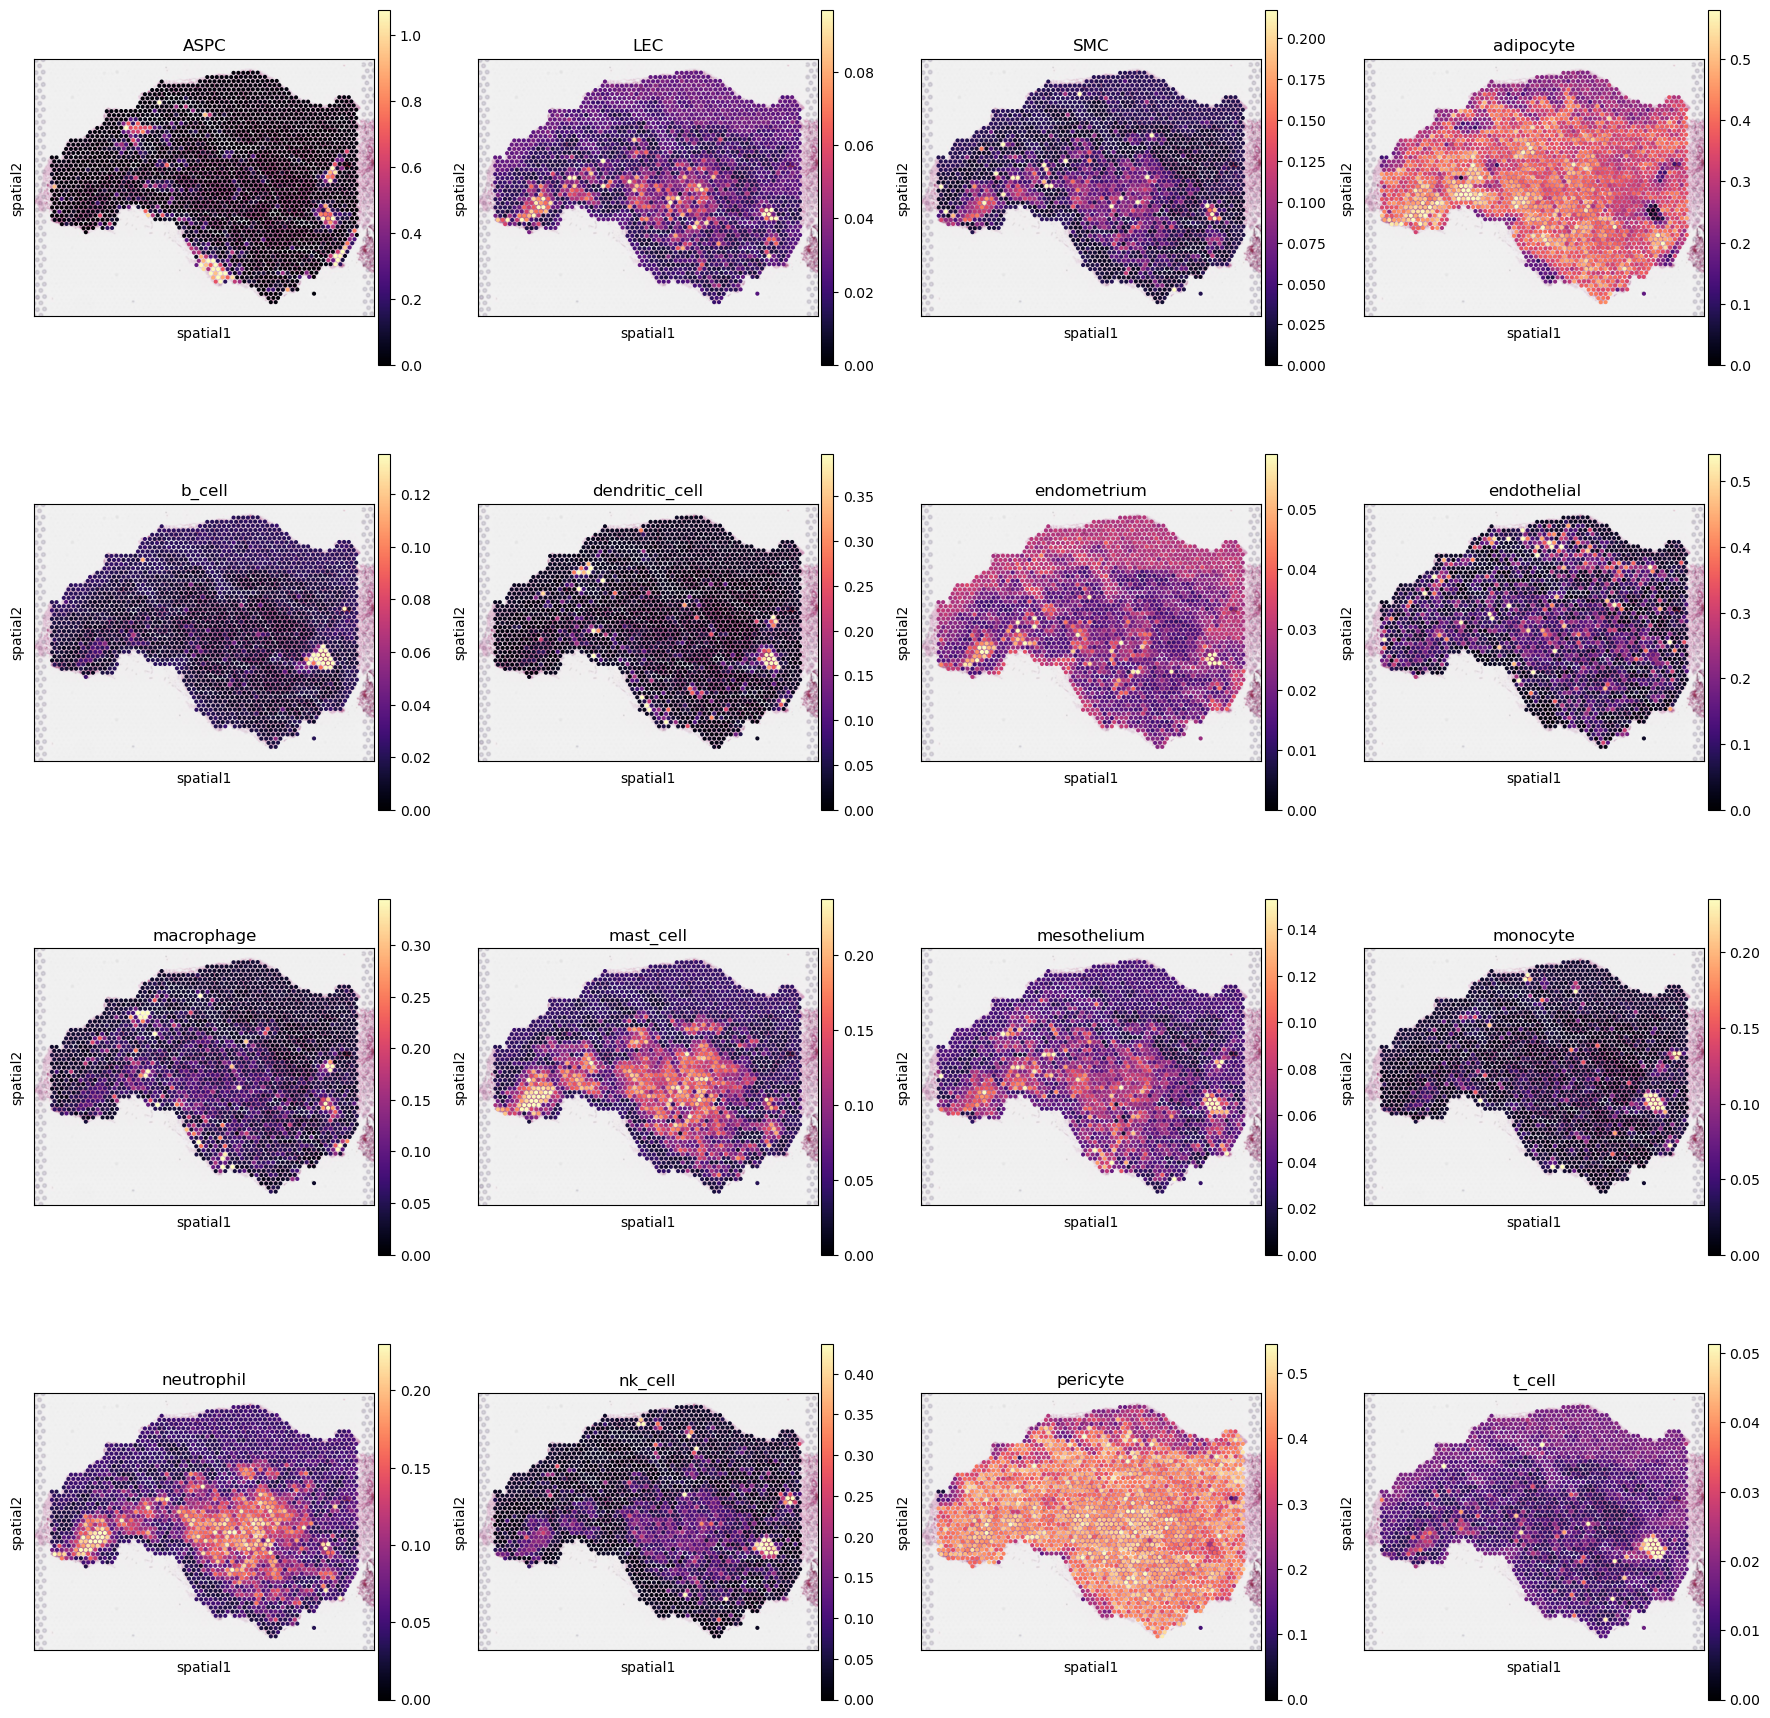

In [28]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, 'count-B1') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2'
                 )

In [8]:
# compute KNN using the cell2location output stored in adata.obsm
sc.pp.neighbors(adata_vis, use_rep='q05_cell_abundance_w_sf',
                n_neighbors = 15)

# Cluster spots into regions using scanpy
sc.tl.leiden(adata_vis, resolution=1.1)

# add region as categorical variable
adata_vis.obs["region_cluster"] = adata_vis.obs["leiden"].astype("category")

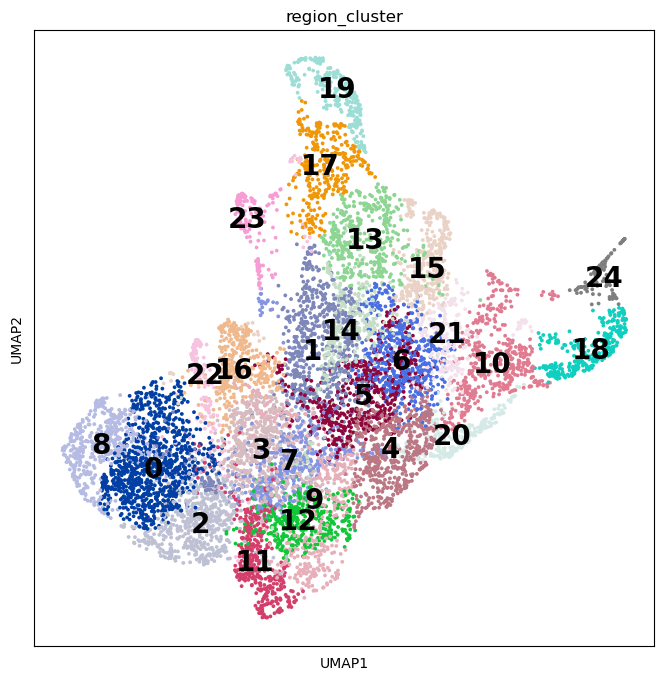

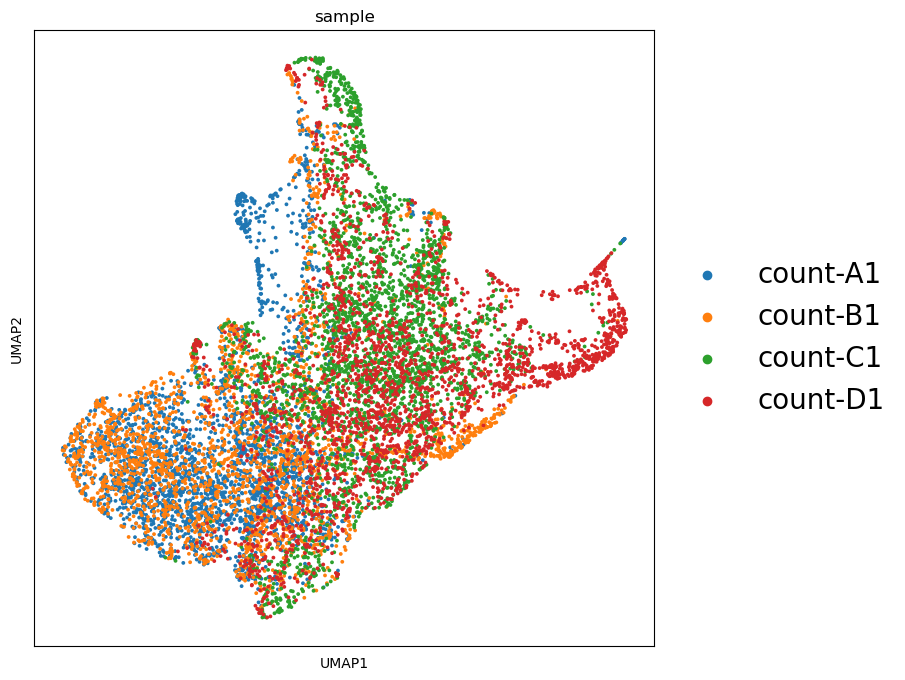

In [9]:
# compute UMAP using KNN graph based on the cell2location output
sc.tl.umap(adata_vis, min_dist = 0.3, spread = 1)

# show regions in UMAP coordinates
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [8, 8]}):
    sc.pl.umap(adata_vis, color=['region_cluster'], size=30,
               color_map = 'RdPu', ncols = 2, legend_loc='on data',
               legend_fontsize=20)
    sc.pl.umap(adata_vis, color=['sample'], size=30,
               color_map = 'RdPu', ncols = 2,
               legend_fontsize=20)


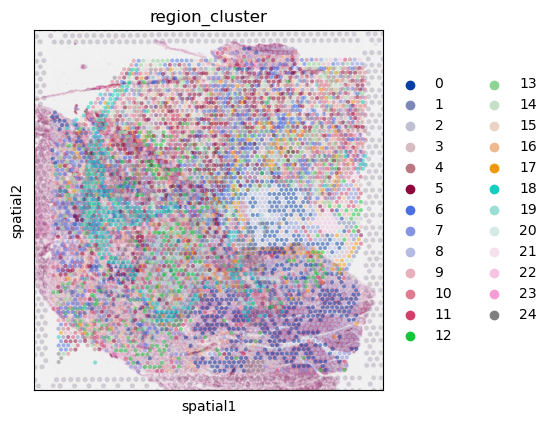

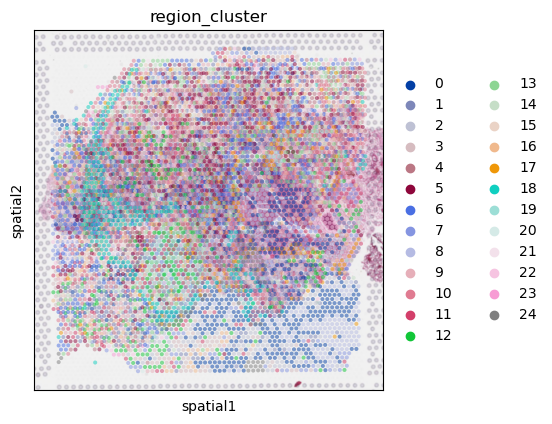

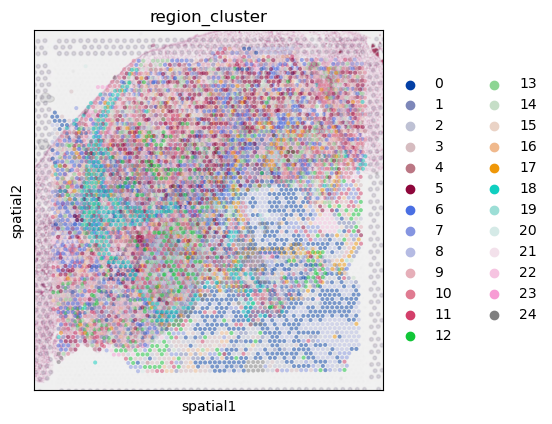

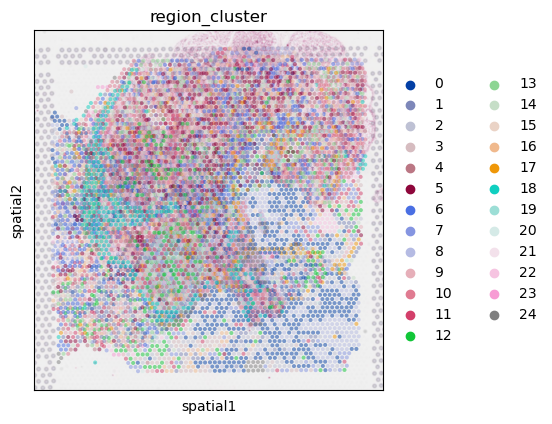

In [10]:
# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    sc.pl.spatial(adata_vis, color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='count-A1')
    sc.pl.spatial(adata_vis, color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='count-B1')
    sc.pl.spatial(adata_vis, color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='count-C1')
    sc.pl.spatial(adata_vis, color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='count-D1')


## NMF

In [26]:
from cell2location import run_colocation
res_dict, slide = run_colocation(
    adata_vis,
    model_name='CoLocatedGroupsSklearnNMF',
    train_args={
      'n_fact': np.arange(5, 30), # IMPORTANT: use a wider range of the number of factors (5-30)
      'sample_name_col': 'sample', # columns in adata_vis.obs that identifies sample
      'n_restarts': 3 # number of training restarts
    },
    # the hyperparameters of NMF can be also adjusted:
    model_kwargs={'alpha': 0.01, 'init': 'random', "nmf_kwd_args": {"tol": 0.000001}},
    export_args={'path': f'{run_name}/CoLocatedComb/'}
)


### Analysis name: CoLocatedGroupsSklearnNMF_5combinations_10486locations_16factors


ValueError: The condensed distance matrix must contain only finite values.

In [27]:
# Compute expected expression per cell type
expected_dict = mod.module.model.compute_expected_per_cell_type(
    mod.samples["post_sample_q05"], mod.adata_manager
)

AttributeError: 'Cell2location' object has no attribute 'samples'

In [18]:
mod.print_gene_loadings(
            loadings_attr="cell_type_fractions",
            gene_fact_name="cell_type_fractions",
            top_n=min(export_args["top_n"], len(var_names)),
        )


NameError: name 'mod' is not defined

In [ ]:
mod.print_gene_loadings(gene_fact_name="gene_factors", loadings_attr="gene_loadings", top_n=10, gene_filt=None, fact_filt=None)

In [15]:
del mod

In [58]:
slide.gene_loadings

AttributeError: 'AnnData' object has no attribute 'gene_loadings'

In [115]:
for key in slide.obsm['q05_cell_abundance_w_sf'].keys():
    print(len(slide.obsm['q05_cell_abundance_w_sf'][key]))

2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733


In [55]:
for key in slide.obsm['q05_cell_abundance_w_sf'].keys():
    print(len(np.where(np.isfinite(slide.obsm['q05_cell_abundance_w_sf'][key]))[0]))


2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733
2733


In [35]:
slide.obsm['q05_cell_abundance_w_sf'].shape

(2733, 16)

In [113]:
for x in slide.obsm['q05_cell_abundance_w_sf']['q05cell_abundance_w_sf_ASPC']:
    print(x)


0.30738964676856995
0.00722815147601068
0.02148762345314026
0.02193636205047369
0.007811892731115222
0.025185628421604635
0.15726989954710008
0.00610615632031113
0.015974231529980898
0.011918534385040402
0.00985415568575263
0.010011009266600012
0.045146756991744044
0.006436661840416491
0.023785592056810856
0.010414586355909704
0.13098113387823104
0.008478251053020358
0.006372372363694012
0.018700926657766105
0.05220769289880991
0.0311010398901999
0.00953899985179305
0.007513625849969685
0.006407392141409218
0.17019299045205116
0.018771461956202985
0.015064776223152877
0.050801531225442884
0.015569324325770139
0.78510881960392
0.010694215632975101
0.009858583146706224
0.01010147393681109
0.012026856560260058
0.06740889251232147
0.009145605424419046
0.4609802633523941
0.04428563769906759
0.043825313262641434
0.02465785751119256
0.027091300673782827
0.018684824276715518
0.01602042717859149
0.056767648085951805
0.006141552841290832
0.0350544111803174
0.043587098643183705
0.0086428398732095

In [97]:
mod = Model(
    10,
    slide.obsm['q05_cell_abundance_w_sf'],
    n_iter=20000,
    verbose=verbose,
    var_names=list(slide.uns["mod"]['factor_names']) + ["neigh_" + i for i in slide.uns["mod"]['factor_names']],
    obs_names=slide.obs_names,
    fact_names=["fact_" + str(i) for i in range(30)],
    sample_id=slide.obs['sample'],
    **model_kwargs,
)

NameError: name 'Model' is not defined

In [96]:

d_model_kwargs = {"init": "random", "random_state": 0, "nmf_kwd_args": {"tol": 0.000001}, "alpha": 0.01}

NameError: name 'train_args' is not defined

In [ ]:
# create model class
n_fact = int(n_fact)
mod = Model(
    n_fact,
    X_data,
    n_iter=train_args["n_iter"],
    verbose=verbose,
    var_names=var_names,
    obs_names=obs_names,
    fact_names=["fact_" + str(i) for i in range(n_fact)],
    sample_id=sample_id,
    **model_kwargs,
)

####### Print run name #######
run_name = (
    str(mod.__class__.__name__)
    + "_"
    + str(mod.n_fact)
    + "combinations_"
    + str(mod.n_obs)
    + "locations_"
    + str(mod.n_var)
    + "factors"
    + export_args["run_name_suffix"]
)
path_name = (
    str(mod.__class__.__name__)
    + "_"
    + str(mod.n_obs)
    + "locations_"
    + str(mod.n_var)
    + "factors"
    + export_args["run_name_suffix"]
)


In [46]:
tt[0].sum()

59732448

In [23]:
np.where([True, False,ddTrue])

(array([0, 2]),)